<a href="https://colab.research.google.com/github/ITU-Business-Analytics-Team/Business_Analytics_for_Professionals/blob/main/Part%20I%20%3A%20Methods%20%26%20Technologies%20for%20Business%20Analytics/Chapter%203%3A%20Prediction%20Modelling/3_4_K_Nearest_Neighbor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction Modelling: Machine Learning**
## K-Nearest Neighbor

## Problem Statement

MNIST (Modified National Institute of Standards and Technology database) consists of images of handwritten digits. In this problem we are going to use k-Nearest Neighbor algorithm to recognize digits from images. There are `1797` `8*8` resolution images consisting of 10 digits. In this dataset every pixel is assumed as an variable thus observations are `1797*64` matrix  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [ ]:
data = load_digits()
X = data["data"]
y = data["target"]

print(X.shape)

(1797, 64)


Lets plot the first image

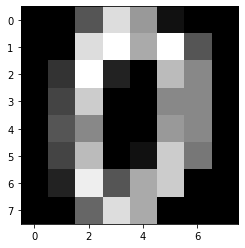

In [ ]:
plt.imshow(X[0].reshape(8,8), "gray")

First split the data into training and testing dataset. Then normalize the data by dividing all values with $255$ since all the pixel values are between $0$ and $255$. Lastly, we are going to apply **KNN** algorithm to classify images

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
mdl = KNeighborsClassifier(n_neighbors=3)
mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)
print("Accuracy score:", accuracy_score(y_test, ypred))

Accuracy score: 0.9833333333333333


We got  $98.3$% accuracy score in the test set using 3 neighbors. Lets try different neighbor sizes and see if we can get better results

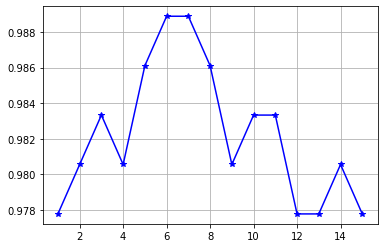

In [ ]:
k_values = np.arange(1,16)
acc_list = []

for k in k_values:
    mdl = KNeighborsClassifier(n_neighbors=k)
    mdl.fit(X_train, y_train)
    ypred = mdl.predict(X_test)
    acc_list.append(accuracy_score(y_test, ypred))

plt.plot(k_values, acc_list, "-*b")
plt.grid()

From the graph we can see that neighbor sizes 6 or 7 seems optimal. Setting neighbor size less than 6 leads the underfitting while setting neighbor size greater than 7 leads to overfitting

In [ ]:
mdl = KNeighborsClassifier(n_neighbors=7)
mdl.fit(X_train, y_train)
ypred = mdl.predict(X_test)

Lets plot images and their predicted labels

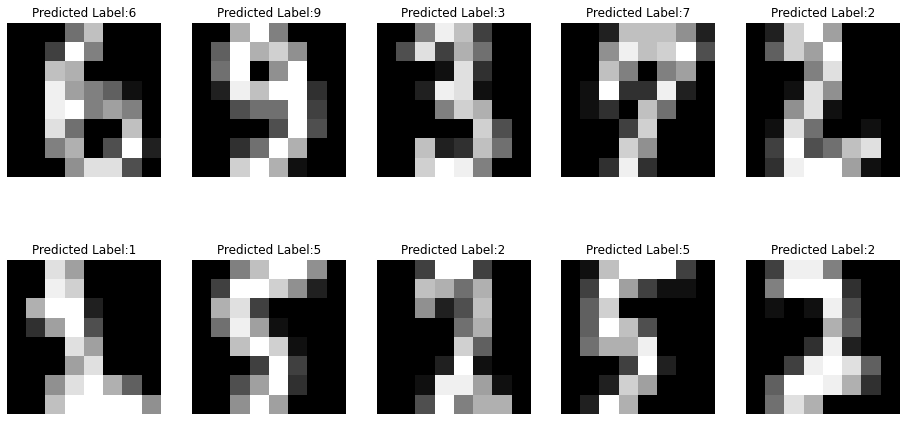

In [ ]:
plt.figure(figsize = (16,8))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(8,8), "gray")
    plt.title("Predicted Label:" + str(ypred[i]))
    plt.axis("off")